**Deskripsi Dataset:**
Dataset ini berisi informasi kependudukan dan tingkat kepesertaan BPJS Kesehatan di wilayah Provinsi Jawa Barat pada tahun 2020. Setiap baris data merepresentasikan satu desa atau kelurahan yang terletak dalam lingkup kabupaten/kota dan kecamatan yang telah diidentifikasi menggunakan kode-kode standar dari Badan Pusat Statistik (BPS) dan Kemendagri.

Sumber dataset:
- https://opendata.jabarprov.go.id/id/dataset/jumlah-warga-yang-terdaftar-menjadi-peserta-bpjs-kesehatanjknkis-berdasarkan-desakelurahan-di-jawa-barat
- https://opendata.jabarprov.go.id/id/dataset/jumlah-penduduk-berdasarkan-desakelurahan-di-jawa-barat
- https://opendata.jabarprov.go.id/id/dataset/daftar-waktu-tempuh-dari-desa-menuju-sarana-kesehatan-terdekat-berdasarkan-desakelurahan-di-jawa-barat
- https://opendata.jabarprov.go.id/id/dataset/daftar-ketersediaan-sarana-kesehatan-terdekat-dari-desa-berdasarkan-desakelurahan-di-jawa-barat
- https://opendata.jabarprov.go.id/id/dataset/daftar-ketersediaan-rumah-sakit-terdekat-dari-desa-berdasarkan-status-di-jawa-barat

Sumber GeoJSON:
- https://github.com/hitamcoklat/Jawa-Barat-Geo-JSON/blob/master/Jabar_By_Kab.geojson
- https://github.com/hitamcoklat/Jawa-Barat-Geo-JSON/blob/master/Jabar_By_Kec.geojson

# **SECTION 0: SETUP DAN IMPORT LIBRARY**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import geopandas as gpd
from scipy.stats import ttest_ind

# **SECTION 1: MEMUAT DAN MEMPERSIAPKAN DATA**

In [2]:
#Jumlah_Peserta_BPJS 2020
bpjs = pd.read_excel("/content/Jumlah_Peserta_BPJS.xlsx")
# Perbaiki nama kolom
bpjs.columns = bpjs.columns.str.strip().str.lower().str.replace(" ", "_")

# Hitung jumlah unik untuk kabupaten/kota, kecamatan, desa
jumlah_kabupaten_kota = bpjs['bps_nama_kabupaten_kota'].nunique()
jumlah_kecamatan = bpjs['bps_nama_kecamatan'].nunique()
jumlah_desa = bpjs['bps_nama_desa_kelurahan'].nunique()

# Ubah kolom jumlah penduduk ke numerik (hilangkan NaN atau nilai tak valid jika ada)
bpjs['jumlah_warga_terdaftar_bpjs'] = pd.to_numeric(bpjs['jumlah__warga_terdaftar_bpjs'], errors='coerce')

# Hitung total jumlah penduduk
total_penduduk = bpjs['jumlah_warga_terdaftar_bpjs'].sum()

# Tampilkan hasil
print(f"Jumlah Kabupaten/Kota : {jumlah_kabupaten_kota}")
print(f"Jumlah Kecamatan       : {jumlah_kecamatan}")
print(f"Jumlah Desa/Kelurahan  : {jumlah_desa}")
print(f"Total Jumlah Penduduk BPJS  : {int(total_penduduk)} orang")

Jumlah Kabupaten/Kota : 19
Jumlah Kecamatan       : 501
Jumlah Desa/Kelurahan  : 3407
Total Jumlah Penduduk BPJS  : 10003986 orang


In [3]:
#Jumlah_Penduduk 2020
pend = pd.read_excel("/content/Jumlah_Penduduk.xlsx")
# Perbaiki nama kolom
pend.columns = pend.columns.str.strip().str.lower().str.replace(" ", "_")

# Ubah kolom penduduk menjadi numerik (menghindari error karena NaN/teks)
pend['jumlah_penduduk'] = pd.to_numeric(pend['jumlah_penduduk'], errors='coerce')

# Hitung total penduduk per tahun
total_per_tahun = pend['jumlah_penduduk'].sum().astype(int)

# Tampilkan hasil
print("Total jumlah penduduk Jawa Barat per tahun 2020:", total_per_tahun, "orang")

Total jumlah penduduk Jawa Barat per tahun 2020: 35614896 orang


In [4]:
# Gabungkan kedua data
df = pd.concat([bpjs, pend], ignore_index=True)

# Bersihkan nama kolom
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Pastikan kolom numerik benar
df['jumlah__warga_terdaftar_bpjs'] = pd.to_numeric(df['jumlah__warga_terdaftar_bpjs'], errors='coerce')
df['jumlah_penduduk'] = pd.to_numeric(df['jumlah_penduduk'], errors='coerce')
df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce')

# 🔹 ANALISIS TINGKAT KABUPATEN/KOTA
df_kab = df.groupby('bps_nama_kabupaten_kota').agg({
    'jumlah__warga_terdaftar_bpjs': 'sum',
    'jumlah_penduduk': 'sum'
}).reset_index()

# Hitung persentase kepesertaan
df_kab['persentase_bpjs'] = (df_kab['jumlah__warga_terdaftar_bpjs'] / df_kab['jumlah_penduduk']) * 100

# Tampilkan hasil terurut dari yang tertinggi
print("\n📍 Persentase Kepesertaan BPJS per Kabupaten/Kota (Tahun 2020):")
print(df_kab.sort_values(by='persentase_bpjs', ascending=False).to_string(index=False))

# Filter untuk tahun 2020 dan jumlah penduduk = 0
df_2020_zero_penduduk = df[(df['tahun'] == 2020) & (df['jumlah_penduduk'] == 0)]

# Hitung jumlah kabupaten/kota unik dengan penduduk 0
jumlah_kabupaten_penduduk_nol = df_2020_zero_penduduk['bps_nama_desa_kelurahan'].nunique()

print(f"📌 Jumlah kabupaten/kota dengan jumlah penduduk 0 pada tahun 2020: {jumlah_kabupaten_penduduk_nol}")
print("\nDaftar kabupaten/kota dengan penduduk 0:")
print(df_2020_zero_penduduk['bps_nama_desa_kelurahan'].unique())


📍 Persentase Kepesertaan BPJS per Kabupaten/Kota (Tahun 2020):
bps_nama_kabupaten_kota  jumlah__warga_terdaftar_bpjs  jumlah_penduduk  persentase_bpjs
            KOTA BANJAR                       47681.0         103949.0        45.869609
     KABUPATEN KUNINGAN                      443272.0        1077279.0        41.147372
  KABUPATEN PANGANDARAN                      155660.0         461348.0        33.740257
     KABUPATEN SUKABUMI                      822632.0        2478099.0        33.196091
        KABUPATEN BOGOR                     1495288.0        4558896.0        32.799344
KABUPATEN BANDUNG BARAT                      536205.0        1664467.0        32.214817
     KABUPATEN KARAWANG                      659558.0        2052406.0        32.135844
   KABUPATEN MAJALENGKA                      381778.0        1270938.0        30.039074
       KABUPATEN CIAMIS                      370829.0        1267049.0        29.267140
   KABUPATEN PURWAKARTA                      229813.0   

In [10]:
# 🔹 ANALISIS TINGKAT KECAMATAN
df_kec = df.groupby(['bps_nama_kabupaten_kota', 'bps_nama_kecamatan']).agg({
    'jumlah__warga_terdaftar_bpjs': 'sum',
    'jumlah_penduduk': 'sum'
}).reset_index()

df_kec['persentase_bpjs'] = (df_kec['jumlah__warga_terdaftar_bpjs'] / df_kec['jumlah_penduduk']) * 100

# Urutkan dari yang tertinggi
df_kec_sorted = df_kec.sort_values(by='persentase_bpjs', ascending=False)

# Tampilkan seluruh hasil kecamatan (descending)
print("\n📍 Persentase Kepesertaan BPJS per Kecamatan:")
# print(df_kec.sort_values(by='persentase_bpjs', ascending=False).to_string(index=False))
print(tabulate(df_kec_sorted, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))


📍 Persentase Kepesertaan BPJS per Kecamatan:
+---------------------------+----------------------+--------------------------------+-------------------+-------------------+
| bps_nama_kabupaten_kota   | bps_nama_kecamatan   |   jumlah__warga_terdaftar_bpjs |   jumlah_penduduk |   persentase_bpjs |
+===========================+======================+================================+===================+===================+
| KABUPATEN BANDUNG         | DAYEUHKOLOT          |                      100449.00 |         117404.00 |             85.56 |
+---------------------------+----------------------+--------------------------------+-------------------+-------------------+
| KABUPATEN KARAWANG        | MAJALAYA             |                       44552.00 |          55935.00 |             79.65 |
+---------------------------+----------------------+--------------------------------+-------------------+-------------------+
| KABUPATEN KUNINGAN        | LURAGUNG             |                    

In [11]:
# 🔹 ANALISIS TINGKAT DESA/KELURAHAN
df_des = df.groupby(['bps_nama_kabupaten_kota', 'bps_nama_kecamatan','bps_nama_desa_kelurahan']).agg({
    'jumlah_warga_terdaftar_bpjs': 'sum',
    'jumlah_penduduk': 'sum'
}).reset_index()

df_des['persentase_bpjs'] = (df_des['jumlah_warga_terdaftar_bpjs'] / df_des['jumlah_penduduk']) * 100

df_des_valid = df_des[df_des['persentase_bpjs'] <= 100].copy()

# Urutkan dari yang tertinggi
df_des_sorted = df_des_valid.sort_values(by='persentase_bpjs', ascending=False)

# Tampilkan seluruh hasil desa/kelurahan (descending)
print("\n📍 Persentase Kepesertaan BPJS per Desa/Kelurahan:")
print(tabulate(df_des_sorted.head(50), headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))


📍 Persentase Kepesertaan BPJS per Desa/Kelurahan:
+---------------------------+----------------------+---------------------------+-------------------------------+-------------------+-------------------+
| bps_nama_kabupaten_kota   | bps_nama_kecamatan   | bps_nama_desa_kelurahan   |   jumlah_warga_terdaftar_bpjs |   jumlah_penduduk |   persentase_bpjs |
+===========================+======================+===========================+===============================+===================+===================+
| KABUPATEN BANDUNG         | DAYEUHKOLOT          | CITEUREUP                 |                      17243.00 |          17243.00 |            100.00 |
+---------------------------+----------------------+---------------------------+-------------------------------+-------------------+-------------------+
| KABUPATEN CIREBON         | SUSUKAN LEBAK        | WILULANG                  |                       1009.00 |           1009.00 |            100.00 |
+---------------------------+--

In [12]:
#Sarana_Waktu_RS 2020
sarana = pd.read_excel("/content/Sarana_Waktu_RS.xlsx")
# Perbaiki nama kolom
sarana.columns = sarana.columns.str.strip().str.lower().str.replace(" ", "_")
print(sarana['sarana_kesehatan'].unique())

['PUSKESMAS' 'POSKESDES' 'PUSTU' 'KLINIK DOKTER' 'TEMPAT PRAKTIK DOKTER'
 'RUMAH SAKIT IBU DAN ANAK' 'POLINDES' 'RUMAH SAKIT UMUM'
 'RUMAH SAKIT BERSALIN']


# **SECTION 2: ANALISIS PETA PERSEBARAN (GEOSPASIAL)**

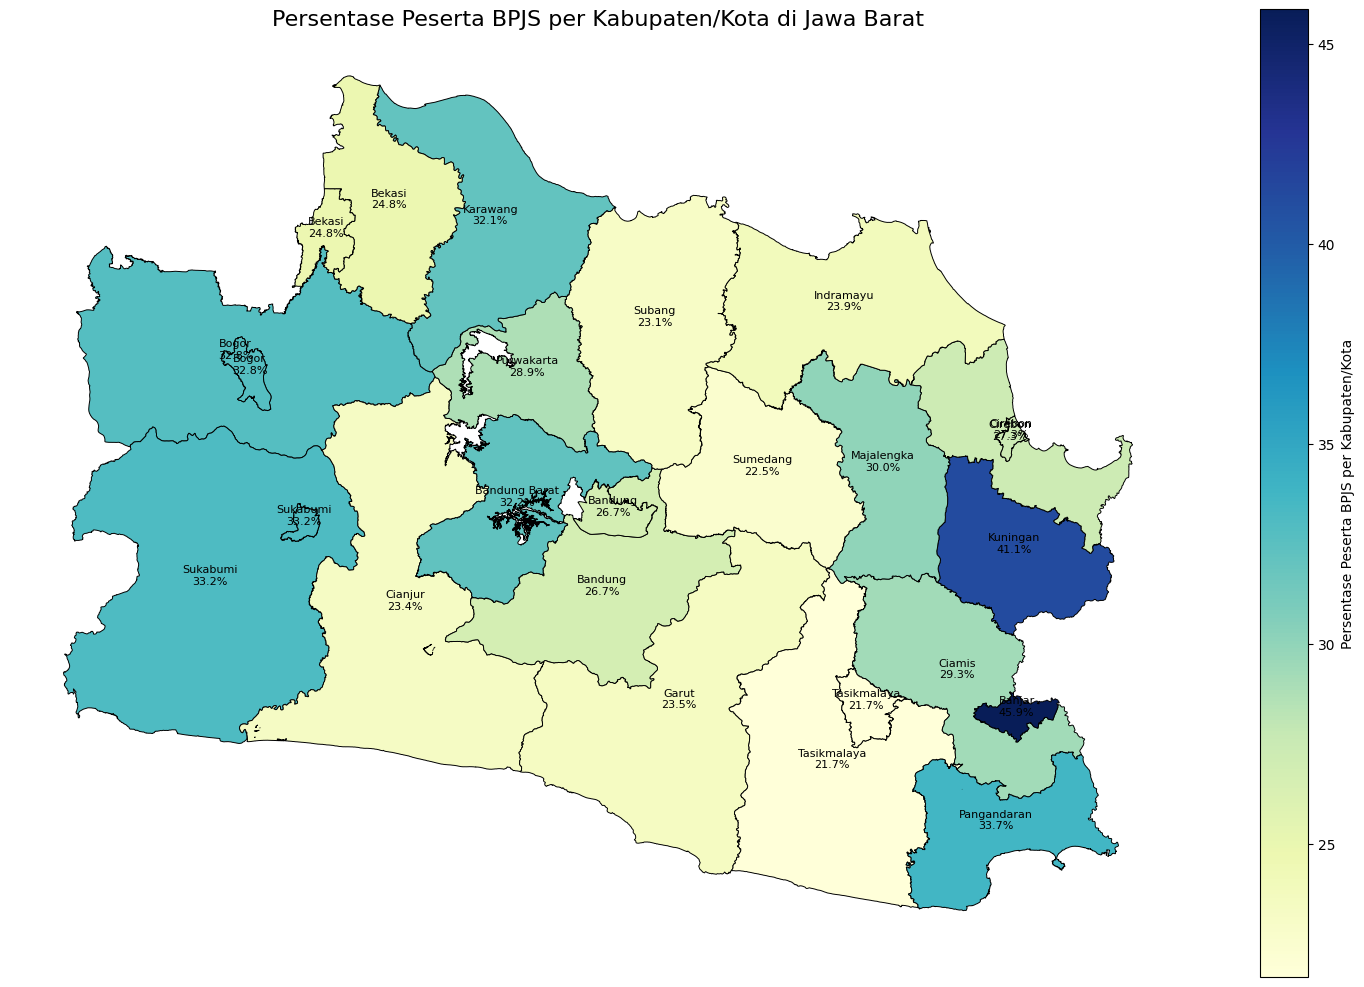

In [ ]:
#GEOSPASIAL KABUPATEN/KOTA
gdf = gpd.read_file('/content/Jabar_By_Kab.geojson')

# --- Bersihkan nama kabupaten/kota ---
def clean_kab_name(name):
    return name.upper().replace("KABUPATEN", "").replace("KOTA", "").strip()

gdf = gdf.rename(columns={'KABKOT': 'bps_nama_kabupaten_kota'})
gdf['bps_nama_kabupaten_kota'] = gdf['bps_nama_kabupaten_kota'].apply(clean_kab_name)
df_kab['bps_nama_kabupaten_kota'] = df_kab['bps_nama_kabupaten_kota'].apply(clean_kab_name)

# --- Gabungkan data ke GeoDataFrame ---
gdf_merged = gdf.merge(df_kab[['bps_nama_kabupaten_kota', 'persentase_bpjs']], on='bps_nama_kabupaten_kota', how='left')

# --- Visualisasi ---
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_merged.plot(
    column='persentase_bpjs',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Persentase Peserta BPJS per Kabupaten/Kota"},
    cmap='YlGnBu',
    edgecolor='black',
    linewidth=0.7
)

# --- Tambahkan label ---
for idx, row in gdf_merged.iterrows():
    if row['geometry'].is_empty or pd.isna(row['persentase_bpjs']):
        continue
    label = f"{row['bps_nama_kabupaten_kota'].title()}\n{row['persentase_bpjs']:.1f}%"
    plt.annotate(
        text=label,
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center',
        fontsize=8,
        color='black'
    )


plt.title("Persentase Peserta BPJS per Kabupaten/Kota di Jawa Barat", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


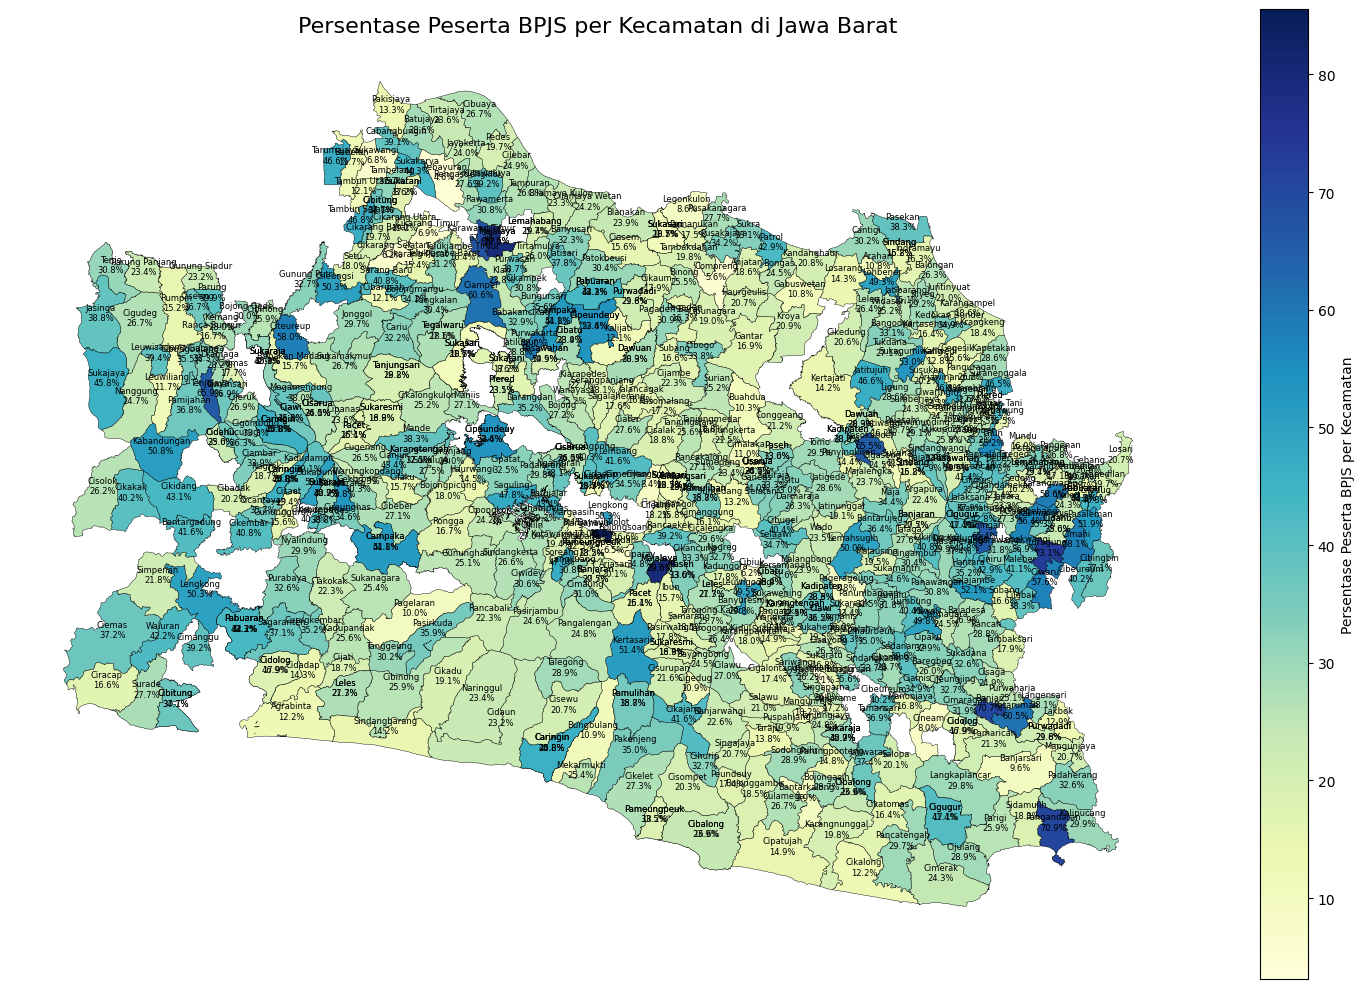

In [ ]:
#GEOSPASIAL KECAMATAN
gdf = gpd.read_file('/content/Jabar_By_Kec.geojson')

# --- Bersihkan nama kecamatan ---
def clean_kec_name(name):
    return name.upper().strip()

gdf = gdf.rename(columns={'KECAMATAN': 'bps_nama_kecamatan'})
gdf['bps_nama_kecamatan'] = gdf['bps_nama_kecamatan'].apply(clean_kec_name)
df_kec['bps_nama_kecamatan'] = df_kec['bps_nama_kecamatan'].apply(clean_kec_name)

# --- Gabungkan data ke GeoDataFrame ---
gdf_merged = gdf.merge(df_kec[['bps_nama_kecamatan', 'persentase_bpjs']], on='bps_nama_kecamatan', how='left')

# --- Visualisasi ---
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_merged.plot(
    column='persentase_bpjs',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Persentase Peserta BPJS per Kecamatan"},
    cmap='YlGnBu',
    edgecolor='black',
    linewidth=0.3
)

# --- Tambahkan label ---
for idx, row in gdf_merged.iterrows():
    if row['geometry'].is_empty or pd.isna(row['persentase_bpjs']):
        continue
    label = f"{row['bps_nama_kecamatan'].title()}\n{row['persentase_bpjs']:.1f}%"
    plt.annotate(
        text=label,
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center',
        fontsize=6,
        color='black'
    )

plt.title("Persentase Peserta BPJS per Kecamatan di Jawa Barat", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# **SECTION 3: MENGUJI HIPOTESIS SEDERHANA**

Korelasi antara Tingkat Kepesertaan dan Waktu Tempuh: 0.03

Rata-rata Tingkat Kepesertaan berdasarkan Ketersediaan RS:
ketersediaan_rumah_sakit
ADA          29.231204
TIDAK ADA    28.862344
Name: persentase_bpjs, dtype: float64 

Hasil Uji T-Test:
T-statistic: 0.4068
P-value: 0.6842

Kesimpulan: Perbedaan ini TIDAK SIGNIFIKAN secara statistik.
Tidak ada cukup bukti untuk menyatakan bahwa ketersediaan RS secara signifikan mempengaruhi rata-rata kepesertaan BPJS.

Rata-rata Persentase BPJS berdasarkan Jenis Sarana Kesehatan Terdekat:
sarana_kesehatan
POLINDES                    30.743240
KLINIK DOKTER               30.282103
RUMAH SAKIT BERSALIN        29.445652
PUSTU                       29.200189
POSKESDES                   29.032681
TEMPAT PRAKTIK DOKTER       28.273269
PUSKESMAS                   27.944941
RUMAH SAKIT UMUM            24.392292
RUMAH SAKIT IBU DAN ANAK    24.081946
Name: persentase_bpjs, dtype: float64


<ipython-input-96-469749665>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_rata_per_sarana.values, y=rata_rata_per_sarana.index, palette="viridis")


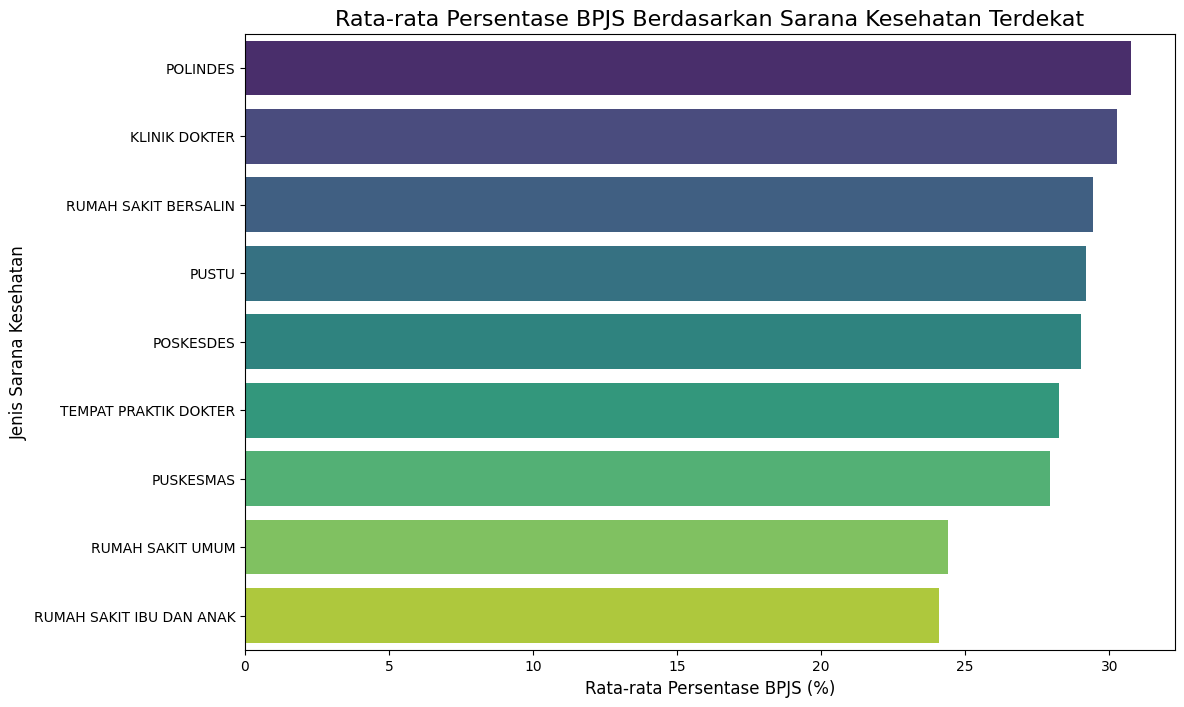

In [ ]:
df_temp = pd.DataFrame({
    'persentase_bpjs': df_des_valid['persentase_bpjs'],
    'sarana_kesehatan': sarana['sarana_kesehatan'],
    'waktu_tempuh': sarana['waktu_tempuh'],
    'ketersediaan_rumah_sakit': sarana['ketersediaan_rumah_sakit']
})

# 1. Hitung koefisien korelasi
correlation_waktu = df_temp['persentase_bpjs'].corr(df_temp['waktu_tempuh'])
print(f"Korelasi antara Tingkat Kepesertaan dan Waktu Tempuh: {correlation_waktu:.2f}\n")

# 2. Bandingkan rata-rata untuk setiap kategori
rata_rata_per_kategori = df_temp.groupby('ketersediaan_rumah_sakit')['persentase_bpjs'].mean()
print("Rata-rata Tingkat Kepesertaan berdasarkan Ketersediaan RS:")
print(rata_rata_per_kategori, "\n")

# 3. Pisahkan data menjadi dua kelompok sampel
grup_ada = df_temp[df_temp['ketersediaan_rumah_sakit'] == 'ADA']['persentase_bpjs']
grup_tidak_ada = df_temp[df_temp['ketersediaan_rumah_sakit'] == 'TIDAK ADA']['persentase_bpjs']

# 4. Lakukan Uji T-Test untuk sampel independen
#    parameter `nan_policy='omit'` akan mengabaikan nilai NaN jika ada
stat, p_value = ttest_ind(grup_ada, grup_tidak_ada, nan_policy='omit')

# 5. Cetak hasilnya dengan format yang mudah dibaca
print(f"Hasil Uji T-Test:")
print(f"T-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 6. Berikan interpretasi berdasarkan P-value
#    Ambang batas umum yang digunakan adalah 0.05
alpha = 0.05
if p_value < alpha:
    print("\nKesimpulan: Perbedaan ini SIGNIFIKAN secara statistik.")
    print("Ada cukup bukti untuk menyatakan bahwa rata-rata kepesertaan BPJS berbeda antara desa yang memiliki RS dan yang tidak.")
else:
    print("\nKesimpulan: Perbedaan ini TIDAK SIGNIFIKAN secara statistik.")
    print("Tidak ada cukup bukti untuk menyatakan bahwa ketersediaan RS secara signifikan mempengaruhi rata-rata kepesertaan BPJS.\n")


# Hitung rata-rata persentase BPJS untuk setiap jenis sarana kesehatan
# dan urutkan dari yang tertinggi ke terendah
rata_rata_per_sarana = df_temp.groupby('sarana_kesehatan')['persentase_bpjs'].mean().sort_values(ascending=False)

print("Rata-rata Persentase BPJS berdasarkan Jenis Sarana Kesehatan Terdekat:")
print(rata_rata_per_sarana)

# Visualisasi dengan Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=rata_rata_per_sarana.values, y=rata_rata_per_sarana.index, palette="viridis")
plt.title('Rata-rata Persentase BPJS Berdasarkan Sarana Kesehatan Terdekat', fontsize=16)
plt.xlabel('Rata-rata Persentase BPJS (%)', fontsize=12)
plt.ylabel('Jenis Sarana Kesehatan', fontsize=12)
plt.show()

Rata-rata Waktu Tempuh ke Setiap Jenis Sarana Kesehatan:
sarana_kesehatan
RUMAH SAKIT IBU DAN ANAK    14.217391
POLINDES                    11.595007
RUMAH SAKIT UMUM            10.184615
PUSKESMAS                   10.014875
KLINIK DOKTER                7.379310
RUMAH SAKIT BERSALIN         6.769231
PUSTU                        6.403968
TEMPAT PRAKTIK DOKTER        6.386598
POSKESDES                    5.373573
Name: waktu_tempuh, dtype: float64


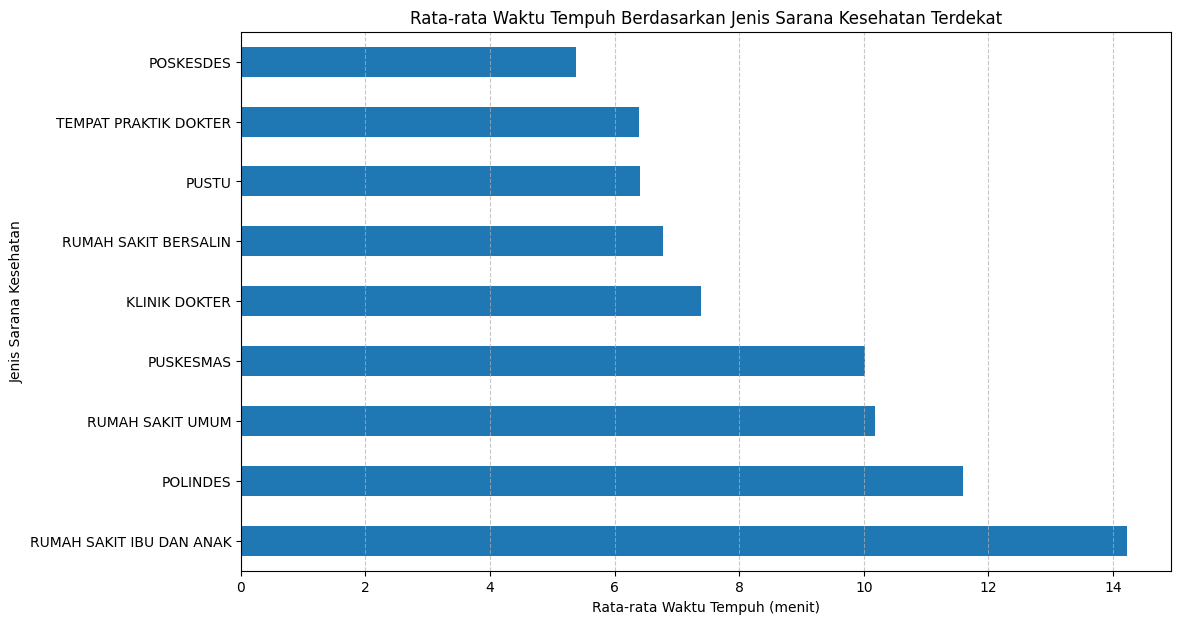

In [ ]:
# Hitung rata-rata waktu tempuh untuk setiap jenis sarana kesehatan
rata_rata_waktu_per_sarana = df_temp.groupby('sarana_kesehatan')['waktu_tempuh'].mean().sort_values(ascending=False)

print("Rata-rata Waktu Tempuh ke Setiap Jenis Sarana Kesehatan:")
print(rata_rata_waktu_per_sarana)

# Visualisasikan dengan bar chart
plt.figure(figsize=(12, 7))
rata_rata_waktu_per_sarana.plot(kind='barh')
plt.title('Rata-rata Waktu Tempuh Berdasarkan Jenis Sarana Kesehatan Terdekat')
plt.xlabel('Rata-rata Waktu Tempuh (menit)')
plt.ylabel('Jenis Sarana Kesehatan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
